In [1]:
!pip install -q ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 25.5 MB/s eta 0:00:0000:01


In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17372, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 17372 (delta 44), reused 24 (delta 22), pack-reused 17308 (from 2)
Receiving objects: 100% (17372/17372), 16.24 MiB | 32.99 MiB/s, done.
Resolving deltas: 100% (11906/11906), done.
/kaggle/working/yolov5


In [3]:
import zipfile
import os
import matplotlib.pyplot as plt
import random
# Upload the .zip from dataset section or manually via Kaggle uploader
dataset_path = '/kaggle/input/cctv-gender-classifier-dataset/CCTV Gender Classifier Dataset'


# Check structure
os.listdir(dataset_path)

['FEMALE', 'MALE']

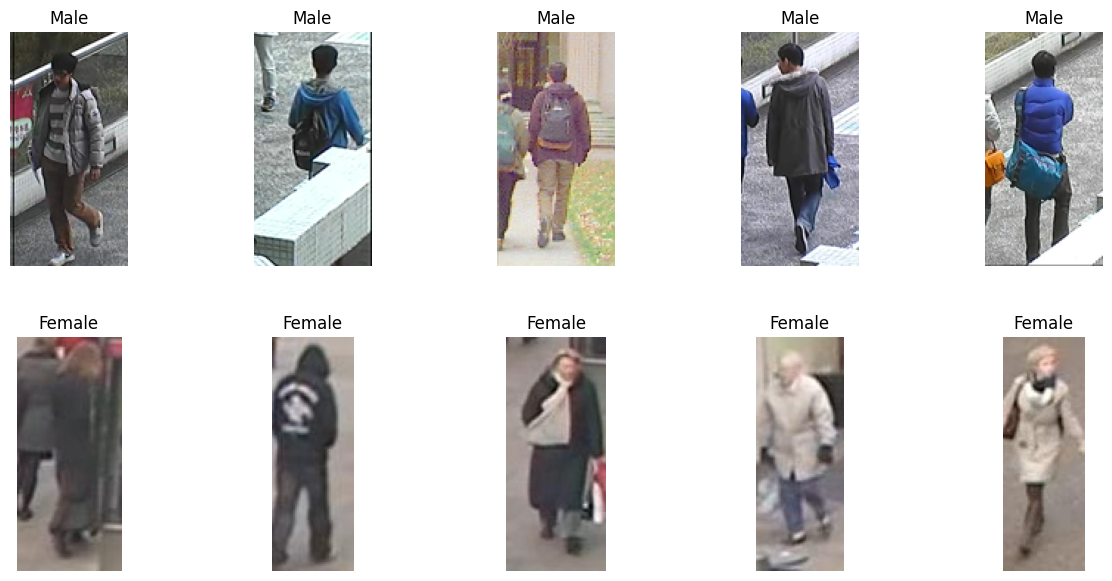

Total number of male images: 9447
Total number of female images: 9676


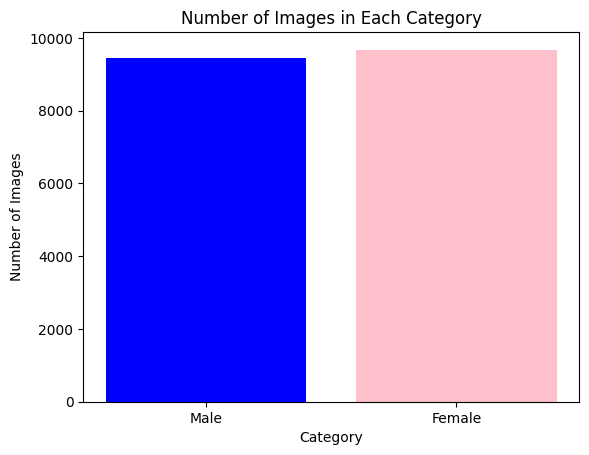

In [4]:
def visualize_random_images(male_folder, female_folder, num_images=5):
    male_images = os.listdir(male_folder)
    female_images = os.listdir(female_folder)

    fig, axes = plt.subplots(2, num_images, figsize=(15, 7))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for i in range(num_images):
        male_image_path = os.path.join(male_folder, random.choice(male_images))
        female_image_path = os.path.join(female_folder, random.choice(female_images))

        male_img = plt.imread(male_image_path)
        female_img = plt.imread(female_image_path)

        axes[0, i].imshow(male_img)
        axes[0, i].axis('off')
        axes[0, i].set_title('Male')

        axes[1, i].imshow(female_img)
        axes[1, i].axis('off')
        axes[1, i].set_title('Female')

    plt.show()

male_folder = '/kaggle/input/cctv-gender-classifier-dataset/CCTV Gender Classifier Dataset/MALE'
female_folder = '/kaggle/input/cctv-gender-classifier-dataset/CCTV Gender Classifier Dataset/FEMALE'

visualize_random_images(male_folder, female_folder)
num_male_images = len(os.listdir(male_folder))
num_female_images = len(os.listdir(female_folder))

print(f"Total number of male images: {num_male_images}")
print(f"Total number of female images: {num_female_images}")

# Create bar plot
categories = ['Male', 'Female']
num_images = [num_male_images, num_female_images]

plt.bar(categories, num_images, color=['blue', 'pink'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.show()

Found 15299 images belonging to 2 classes.
Found 3824 images belonging to 2 classes.
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 115s 227ms/step - accuracy: 0.6425 - loss: 0.6485 - val_accuracy: 0.5230 - val_loss: 0.7399
Epoch 2/25
479/479 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.7627 - loss: 0.4985 - val_accuracy: 0.5884 - val_loss: 0.7355
Epoch 3/25
479/479 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8241 - loss: 0.3860 - val_accuracy: 0.5923 - val_loss: 0.7737
Epoch 4/25
479/479 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.8604 - loss: 0.3150 - val_accuracy: 0.6036 - val_loss: 0.8000
Epoch 5/25
479/479 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8955 - loss: 0.2570 - val_accuracy: 0.5954 - val_loss: 1.0623
Epoch 6/25
479/479 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.9166 - loss: 0.2058 - val_accuracy: 0.5918 - val_loss: 1.0496
Epoch 7/25
479/479 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.9327 - loss: 0.1640 - val_accuracy: 0.5889 - val_loss: 1.2746
Epoch 8/25
479/479 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9456 - loss: 0.1316 - val_accur

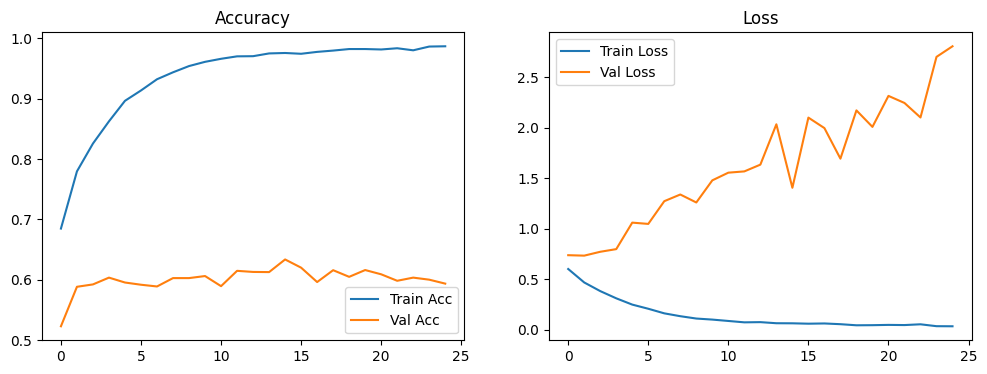

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Constants
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 25
SEED = 42
DATASET_PATH = '/kaggle/input/cctv-gender-classifier-dataset/CCTV Gender Classifier Dataset'

# Data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=SEED
)

val_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=SEED
)

# Model definition
model = Sequential([
    tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: Male, Female
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback to save best model
checkpoint = ModelCheckpoint('best_model_1.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# Train
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data,
    callbacks=[checkpoint]
)

# Save final model
model.save("gender_classifier_1.keras")

# Plot training results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()